<a href="https://colab.research.google.com/github/aaayup/anomaly_detection/blob/main/ARIMA(normal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data 불러오기#

In [161]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

In [162]:
df=pd.read_csv('/home/normal_simulation_set.csv')
df = df.copy()
df.head()

,Unnamed: 0,update_time,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,...,heart_rate1346,event1346,heart_rate1347,event1347,heart_rate1348,event1348,heart_rate1349,event1349,heart_rate1350,event1350
0,0,2020-01-01 00:00:00,96,0,75,0,97,0,80,0,...,77,0,88,0,69,0,78,0,79,0
1,1,2020-01-01 00:10:00,73,0,79,0,84,0,84,0,...,86,0,86,0,84,0,71,0,65,0
2,2,2020-01-01 00:20:00,74,0,58,1,80,0,70,0,...,78,0,77,0,93,0,99,0,70,0
3,3,2020-01-01 00:30:00,69,0,96,0,61,0,86,0,...,72,0,80,0,75,0,74,0,78,0
4,4,2020-01-01 00:40:00,88,0,62,0,77,0,75,0,...,95,0,66,0,90,0,89,0,75,0


In [163]:
df.shape

(1350, 2702)

In [164]:
#변수 선택
df = df[['update_time','heart_rate1','event1']]
df.head()

,update_time,heart_rate1,event1
0,2020-01-01 00:00:00,96,0
1,2020-01-01 00:10:00,73,0
2,2020-01-01 00:20:00,74,0
3,2020-01-01 00:30:00,69,0
4,2020-01-01 00:40:00,88,0


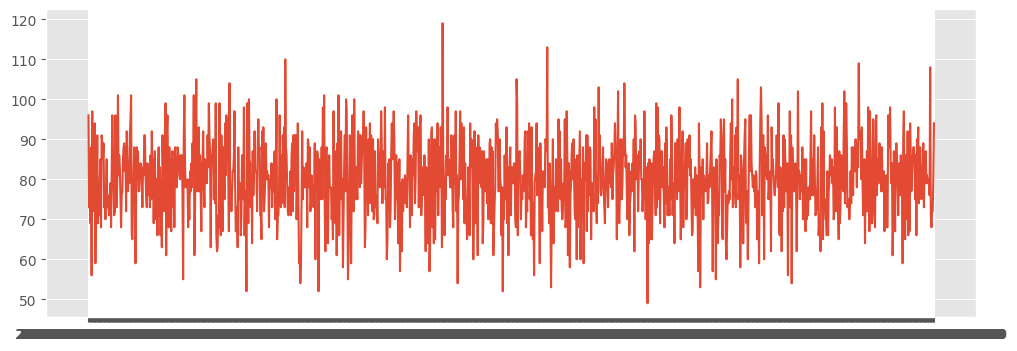

In [165]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(df['update_time'], df['heart_rate1'])
plt.show()

In [166]:
df_train = df[:1008]
df_test = df[1008:]
df_train.head()

,update_time,heart_rate1,event1
0,2020-01-01 00:00:00,96,0
1,2020-01-01 00:10:00,73,0
2,2020-01-01 00:20:00,74,0
3,2020-01-01 00:30:00,69,0
4,2020-01-01 00:40:00,88,0


In [167]:
print('train dataset',df_train.shape)
print('test dataset' ,df_test.shape)

train dataset (1008, 3)
test dataset (342, 3)


In [168]:
event1_counts_train = df_train['event1'].value_counts()
event1_counts_test = df_test['event1'].value_counts()

# event 비율 계산
event1_ratio_train = event1_counts_train[1] / (event1_counts_train[0] +event1_counts_train[1])
event1_ratio_test = event1_counts_test[1] / (event1_counts_test[0] +event1_counts_test[1])
print('train', event1_ratio_train)
print('test', event1_ratio_test)

train 0.040674603174603176
test 0.03216374269005848


In [170]:
df_test.head(5)

,update_time,heart_rate1,event1
1008,2020-01-08 00:00:00,85,0
1009,2020-01-08 00:10:00,95,0
1010,2020-01-08 00:20:00,86,0
1011,2020-01-08 00:30:00,66,0
1012,2020-01-08 00:40:00,65,0


#STL 분해#

<Figure size 1200x400 with 0 Axes>

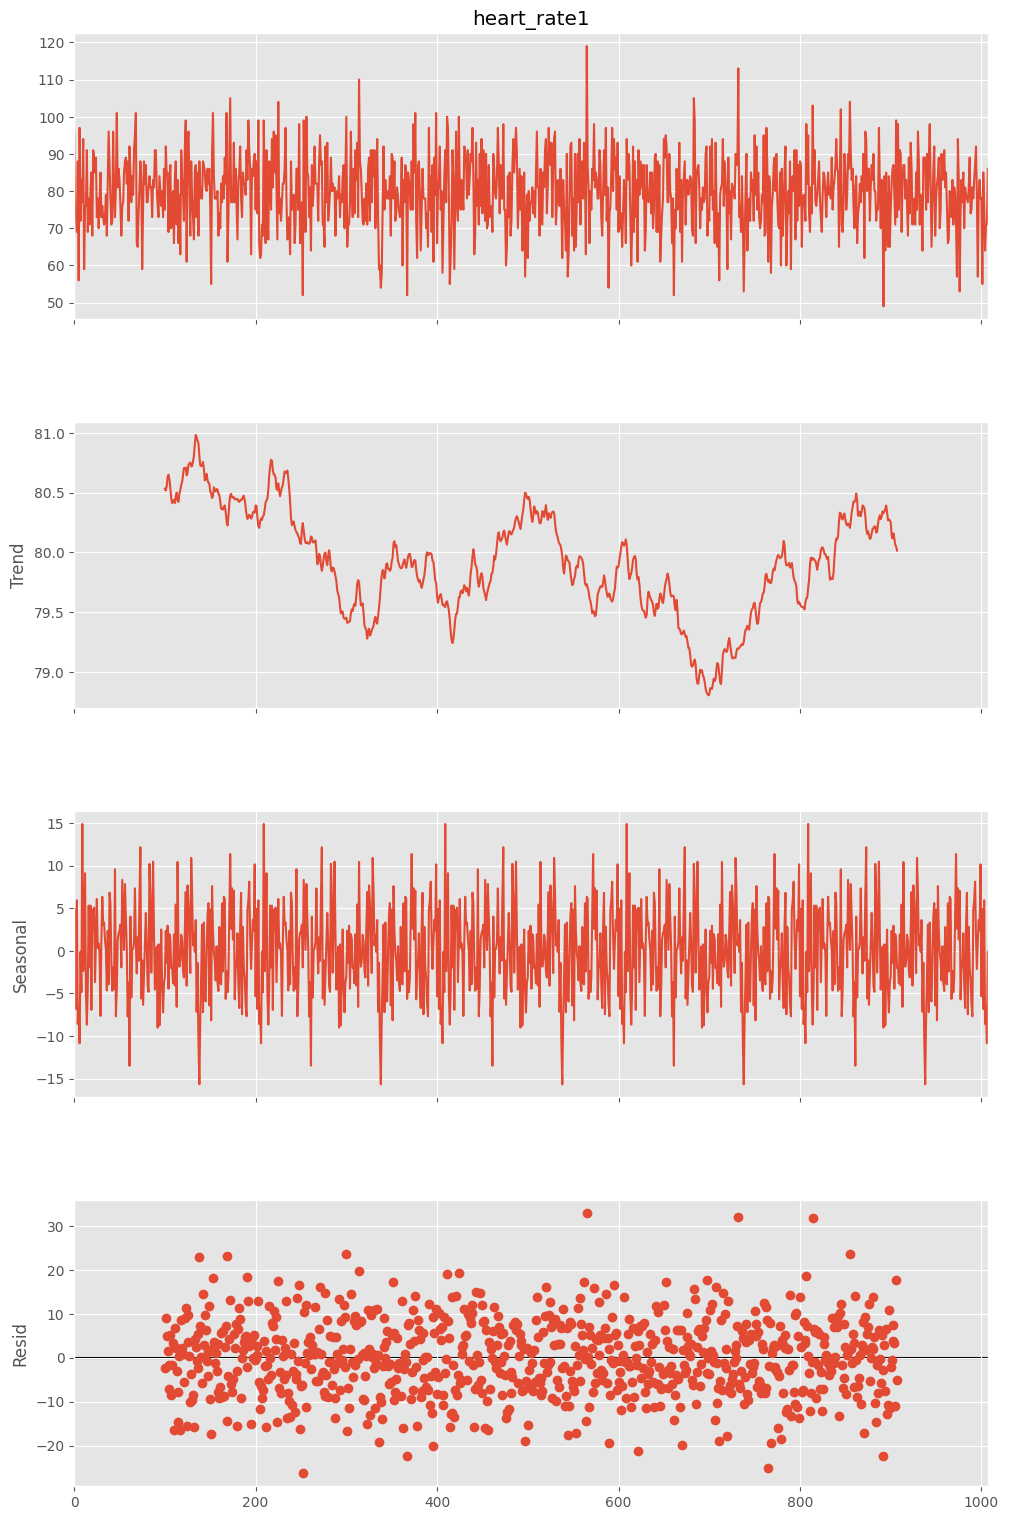

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose( df_train['heart_rate1'], period =200)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,18)

# Test #

##ADF test##

In [172]:
from statsmodels.tsa.stattools import adfuller
#Ho: 정상성 만족X
#H1: 정상성 만족O
# A function defined for Dickey Fuller Test
def adfuller_test(births):
    result=adfuller(births)     #adf검정
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:    #p : result[1] <= 0.05
        print("정상성 만족O")
    else:
        print("정상성 만족X ")

In [173]:
adfuller_test(df_train['heart_rate1'])

ADF Test Statistic : -32.572533203975986
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1007
정상성 만족O


#ACF, PACF#

## diff(0)##

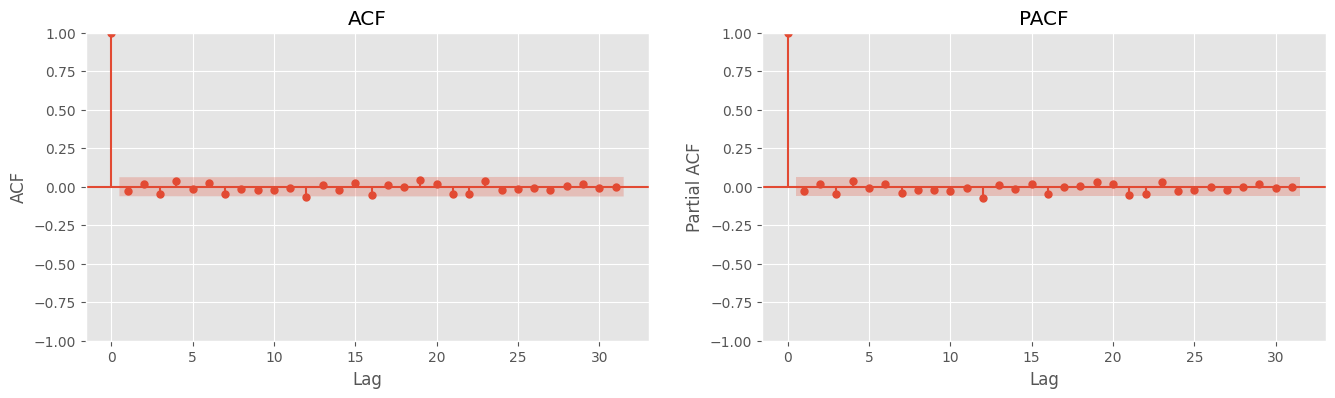

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(df_train['heart_rate1'], title='ACF',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(df_train['heart_rate1'], title='PACF',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

#ARIMA#

##fit##

In [175]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['heart_rate1'], order=(1,1,2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            heart_rate1   No. Observations:                 1008
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3733.582
Date:                Fri, 13 Oct 2023   AIC                           7475.164
Time:                        08:42:08   BIC                           7494.823
Sample:                             0   HQIC                          7482.633
                               - 1008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7924      0.212     -3.745      0.000      -1.207      -0.378
ma.L1         -0.2440      0.280     -0.872      0.383      -0.792       0.304
ma.L2         -0.7559      0.257     -2.943      0.0

In [176]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['heart_rate1'], order=(1,1,1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:            heart_rate1   No. Observations:                 1008
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3735.043
Date:                Fri, 13 Oct 2023   AIC                           7476.085
Time:                        08:42:09   BIC                           7490.830
Sample:                             0   HQIC                          7481.687
                               - 1008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.031     -0.802      0.422      -0.086       0.036
ma.L1         -1.0000      0.406     -2.461      0.014      -1.796      -0.204
sigma2        96.8694     39.220      2.470      0.0

ARIMA(1,0,3) : AIC 351293.571

In [177]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['heart_rate1'], order=(1,0,3))

result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            heart_rate1   No. Observations:                 1008
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -3732.528
Date:                Fri, 13 Oct 2023   AIC                           7477.057
Time:                        08:42:10   BIC                           7506.551
Sample:                             0   HQIC                          7488.262
                               - 1008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.8524      0.300    266.009      0.000      79.264      80.441
ar.L1         -0.6992      0.254     -2.755      0.006      -1.197      -0.202
ma.L1          0.6777      0.257      2.642      0.0

## Predict ##

In [192]:
df_test.tail()

,update_time,heart_rate1,event1,lower,upper,pred,pred_y
1345,2020-01-10 08:10:00,68,0,60.564432,99.140279,79.852355,0
1346,2020-01-10 08:20:00,72,0,60.564432,99.140279,79.852355,0
1347,2020-01-10 08:30:00,72,0,60.564432,99.140279,79.852355,0
1348,2020-01-10 08:40:00,80,0,60.564432,99.140279,79.852355,0
1349,2020-01-10 08:50:00,94,0,60.564432,99.140279,79.852355,0


In [199]:
forecast_ci

,lower heart_rate1,upper heart_rate1
1008,60.572681,99.047926
1009,60.998187,99.482328
1010,60.123530,98.613020
1011,60.924020,99.457669
1012,60.338060,98.893280
...,...,...
1346,60.564432,99.140279
1347,60.564432,99.140279
1348,60.564432,99.140279
1349,60.564432,99.140279


In [200]:
# Testset Predict
start_idx =  1008  # 테스트 데이터셋의 시작 인덱스
end_idx = 1008 + len(df_test)  # 테스트 데이터셋의 끝 인덱스

forecast = result.get_prediction(start=start_idx, end=end_idx, dynamic=False)

#신뢰구간과 pred 할당
forecast_ci = forecast.conf_int()
forecast_mean = forecast.predicted_mean

#신뢰구간 하한상한, pred 변수 생성
df_test['lower'] = forecast_ci.iloc[:,0]
df_test['upper'] = forecast_ci.iloc[:,1]
df_test['pred'] = forecast_mean

<ipython-input-200-4d2d25f70439>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['lower'] = forecast_ci.iloc[:,0]
<ipython-input-200-4d2d25f70439>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['upper'] = forecast_ci.iloc[:,1]
<ipython-input-200-4d2d25f70439>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [201]:
df_test

,update_time,heart_rate1,event1,lower,upper,pred,pred_y
1008,2020-01-08 00:00:00,85,0,60.572681,99.047926,79.810303,0
1009,2020-01-08 00:10:00,95,0,60.998187,99.482328,80.240258,0
1010,2020-01-08 00:20:00,86,0,60.123530,98.613020,79.368275,0
1011,2020-01-08 00:30:00,66,0,60.924020,99.457669,80.190844,0
1012,2020-01-08 00:40:00,65,0,60.338060,98.893280,79.615670,0
...,...,...,...,...,...,...,...
1345,2020-01-10 08:10:00,68,0,60.564432,99.140279,79.852355,0
1346,2020-01-10 08:20:00,72,0,60.564432,99.140279,79.852355,0
1347,2020-01-10 08:30:00,72,0,60.564432,99.140279,79.852355,0
1348,2020-01-10 08:40:00,80,0,60.564432,99.140279,79.852355,0


In [202]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

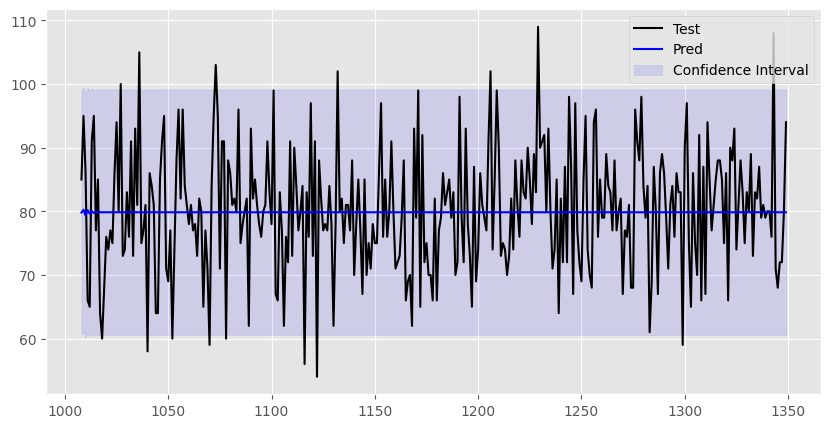

In [203]:
plt.figure(figsize=(10,5))
plt.plot(df_test.index, df_test['heart_rate1'], label="Test", color='black')
plt.plot(df_test.index, df_test['pred'],label="Pred", color='b')

plt.fill_between(df_test.index,  df_test['lower'], df_test['upper'], color='blue', alpha=0.1, label='Confidence Interval')

plt.legend()
plt.show()

In [205]:
# df_test에서 신뢰 구간을 벗어나는 데이터 추출
out_of_confidence_interval = df_test[(df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper'])]

#pred_y에 이상치 1, 0 할당
df_test['pred_y'] = np.where((df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper']), 1, 0)

# 추출된 데이터 출력
df_test

<ipython-input-205-8bcc5b9e708d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_y'] = np.where((df_test['heart_rate1'] < df_test['lower']) | (df_test['heart_rate1'] > df_test['upper']), 1, 0)


,update_time,heart_rate1,event1,lower,upper,pred,pred_y
1008,2020-01-08 00:00:00,85,0,60.572681,99.047926,79.810303,0
1009,2020-01-08 00:10:00,95,0,60.998187,99.482328,80.240258,0
1010,2020-01-08 00:20:00,86,0,60.123530,98.613020,79.368275,0
1011,2020-01-08 00:30:00,66,0,60.924020,99.457669,80.190844,0
1012,2020-01-08 00:40:00,65,0,60.338060,98.893280,79.615670,0
...,...,...,...,...,...,...,...
1345,2020-01-10 08:10:00,68,0,60.564432,99.140279,79.852355,0
1346,2020-01-10 08:20:00,72,0,60.564432,99.140279,79.852355,0
1347,2020-01-10 08:30:00,72,0,60.564432,99.140279,79.852355,0
1348,2020-01-10 08:40:00,80,0,60.564432,99.140279,79.852355,0


##Outlier

In [206]:
#실제 test셋 event와 예측 event의 비율 차이
print('실제 이상치 비율', event1_ratio_test)
print('예측 이상치 비율', (out_of_confidence_interval.shape[0]/df_test.shape[0]))

실제 이상치 비율 0.03216374269005848
예측 이상치 비율 0.043859649122807015


In [207]:
#이상치
  #Testset
print('Testset',df_test.shape[0], '중에', out_of_confidence_interval.shape[0],'개', round((out_of_confidence_interval.shape[0]/df_test.shape[0]*100),2) ,'% 이상치')

Testset 342 중에 15 개 4.39 % 이상치


In [208]:
print(event1_counts_test[1], '개 중에', out_of_confidence_interval.shape[0],'개 이상치로 판단')

11 개 중에 15 개 이상치로 판단


In [209]:
#실제 이상치를 맞게 예측한 개수
len(df_test[(df_test['event1'] == 1) & (df_test['pred_y'] == 1)])

11

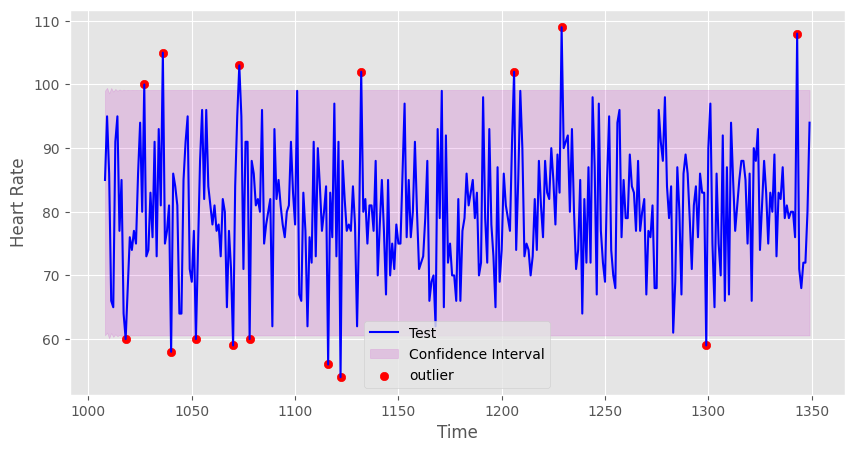

In [210]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(df_test.index, df_test['heart_rate1'], label="Test", color ='b')

plt.fill_between(df_test.index, df_test['lower'], df_test['upper'] , alpha=0.15, label='Confidence Interval', color = 'm')

# 추출된 행을 빨간 점으로 표시
plt.scatter(out_of_confidence_interval.index, out_of_confidence_interval['heart_rate1'], color='red', label="outlier")

plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.show()

In [213]:
#변수 삭제
df_pred = df_test.drop(['upper', 'lower', 'pred'], axis=1)
df_pred.head()

,update_time,heart_rate1,event1,pred_y
1008,2020-01-08 00:00:00,85,0,0
1009,2020-01-08 00:10:00,95,0,0
1010,2020-01-08 00:20:00,86,0,0
1011,2020-01-08 00:30:00,66,0,0
1012,2020-01-08 00:40:00,65,0,0


In [215]:
from google.colab import files
df_pred.to_csv('ARIMA_nomal.csv', index=False)


# CSV 파일 다운로드
#files.download('ARIMA_nomal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>